<a href="https://colab.research.google.com/github/fpinto2021/Mechanical-Vibrations/blob/main/Project1Problem6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

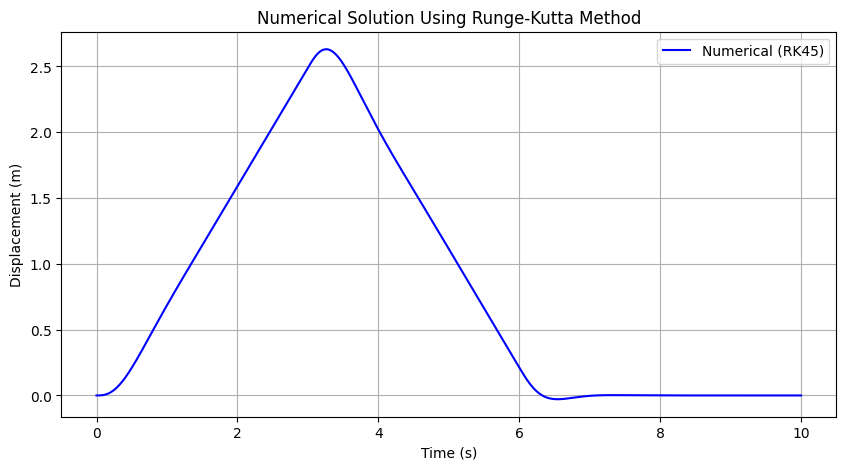

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Given parameters
S = 27
m = S
c = 150 + S
k = 750
F0 = S + 2000
t1 = 3
t2 = 6

# Computing natural frequency
omega_n = np.sqrt(k / m)

# Time range
t_span = (0, 10)
t_eval = np.linspace(0, 10, 1000)

# Defining force function
def force_function(t):
    if 0 <= t < t1:
        return (F0 * t) / t1
    elif t1 <= t < t2:
        return F0 * (t2 - t) / (t2 - t1)
    else:
        return 0

# Defining first-order equations
def system(t, y):
    x, v = y
    dxdt = v
    dvdt = (force_function(t) - c * v - k * x) / m
    return [dxdt, dvdt]

# Initial conditions
x0 = [0, 0]

# Solving using Runge-Kutta (RK45) method
sol = solve_ivp(system, t_span, x0, method='RK45', t_eval=t_eval)

# Plotting results
plt.figure(figsize=(10, 5))
plt.plot(sol.t, sol.y[0], 'b', label="Numerical (RK45)")
plt.xlabel("Time (s)")
plt.ylabel("Displacement (m)")
plt.title("Numerical Solution Using Runge-Kutta Method")
plt.grid()
plt.legend()
plt.show()